Dataset Shape: (101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2



Missing Values if any:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


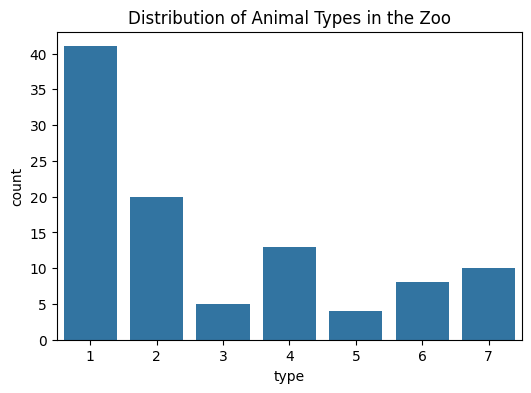

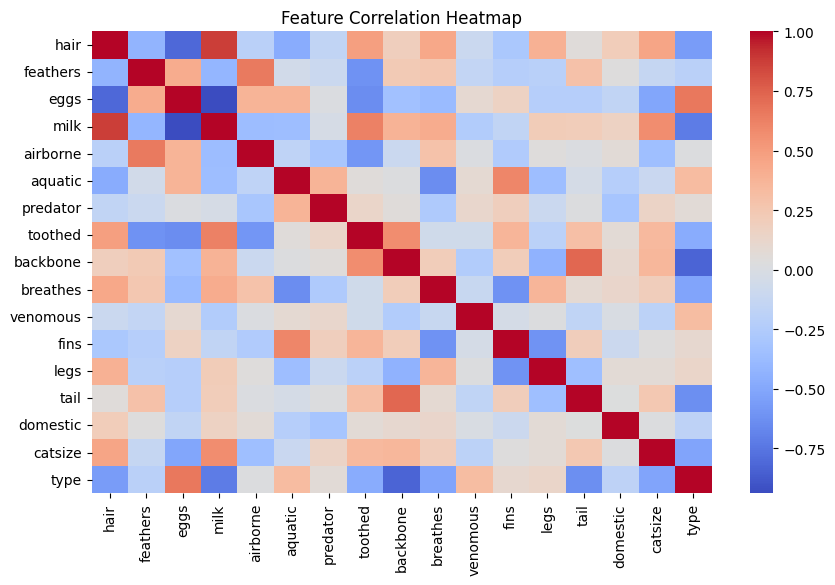


Outliers have been treated using the IQR method.


c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Best Parameters: {'metric': 'euclidean', 'n_neighbors': 2}

Accuracy: 0.9354838709677419

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.95      0.88      0.90        31
weighted avg       0.95      0.94      0.93        31



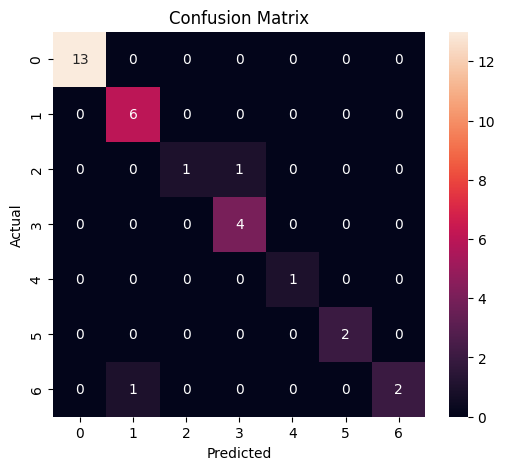

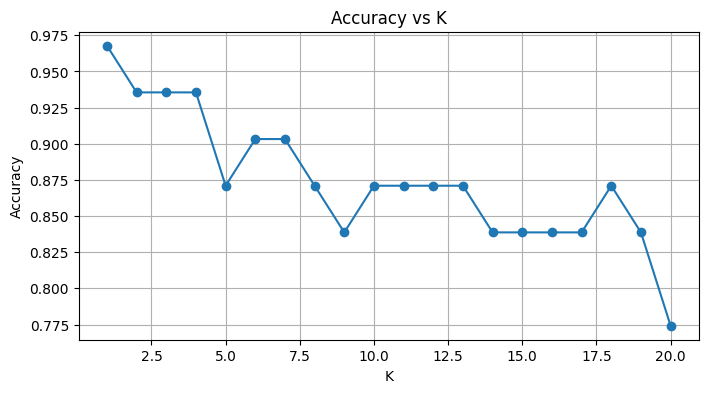

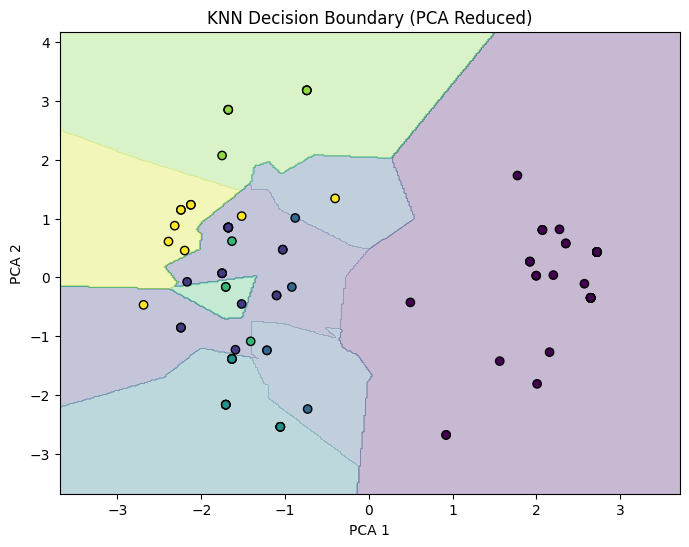

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# ------------------------------------------------------------
# 1. Loading the Dataset
# ------------------------------------------------------------
df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/KNN/KNN/Zoo.csv")   

print("Dataset Shape:", df.shape)
display(df.head())
display(df.tail())

# ------------------------------------------------------------
# 2. Missing Value Handling
# ------------------------------------------------------------
print("\nMissing Values if any:")
print(df.isnull().sum())  # Prints the number of cumulative missing values per column

#  No missing values found, but if there were, we could handle them just like this:
df.fillna(df.median(numeric_only=True), inplace=True)

# ------------------------------------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df)
plt.title("Distribution of Animal Types in the Zoo")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.drop("animal name", axis=1).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ------------------------------------------------------------
# 4. Outlier Treatment using IQR (on numeric columns)
# ------------------------------------------------------------
numeric_cols = df.drop(["animal name","type"], axis=1).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

print("\nOutliers have been treated using the IQR method.")

# ------------------------------------------------------------
# 5. Feature / Target Split
# ------------------------------------------------------------
df.drop("animal name", axis=1, inplace=True)

X = df.drop("type", axis=1)
y = df["type"]

# ------------------------------------------------------------
# 6. Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# 7. Train Test Split (70–30)
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# ------------------------------------------------------------
# 8. Hyperparameter Tuning (K + Distance Metric)
# ------------------------------------------------------------
param_grid = {
    "n_neighbors": list(range(1,21)),
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

knn = grid.best_estimator_

# ------------------------------------------------------------
# 9. Model Evaluation
# ------------------------------------------------------------
y_pred = knn.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------------------------------------------
# 10. Accuracy vs K Visualization
# ------------------------------------------------------------
acc = []
for k in range(1,21):
    m = KNeighborsClassifier(n_neighbors=k, metric=grid.best_params_["metric"])
    m.fit(X_train, y_train)
    acc.append(m.score(X_test, y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,21), acc, marker="o")
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 11. Decision Boundary Visualization (using PCA to 2D)
# ------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

knn2 = KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"])
knn2.fit(X_train_pca, y_train_pca)

x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor="k")
plt.title("KNN Decision Boundary (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [1]:
print("\n--- Interview Questions ---")

print("""
1. Key Hyperparameters in KNN:
- n_neighbors (K): Number of nearest neighbors.
- metric: Distance metric (euclidean, manhattan, minkowski).
- weights: uniform or distance.
- p: Power parameter for Minkowski distance.

2. Distance Metrics in KNN:
- Euclidean Distance
- Manhattan Distance
- Minkowski Distance
- Chebyshev Distance
""")


--- Interview Questions ---

1. Key Hyperparameters in KNN:
- n_neighbors (K): Number of nearest neighbors.
- metric: Distance metric (euclidean, manhattan, minkowski).
- weights: uniform or distance.
- p: Power parameter for Minkowski distance.

2. Distance Metrics in KNN:
- Euclidean Distance
- Manhattan Distance
- Minkowski Distance
- Chebyshev Distance

